In [223]:
import librosa
import librosa.display
import matplotlib.pyplot as plt



In [107]:
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile

In [108]:
#Ravdess_song
Audio( r"C:\Users\Harshita Shukla\SER\data\RAVDESS_song\Actor_01\03-02-01-01-01-01-01.wav")

In [109]:
#Ravdess speech
Audio(r"C:\Users\Harshita Shukla\SER\data\RAVDESS_Speech\Actor_01\03-01-01-01-01-01-01.wav")

In [110]:
# Tess
Audio("C:/Users/Harshita Shukla/SER/data/TESS/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav")

In [112]:
import pandas as pd
import seaborn 

In [113]:
import os

In [114]:
#Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav)
"""
Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).
"""
# let's check the emotion in folders

'\nModality (01 = full-AV, 02 = video-only, 03 = audio-only).\n\nVocal channel (01 = speech, 02 = song).\n\nEmotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).\n\nEmotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the \'neutral\' emotion.\n\nStatement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").\n\nRepetition (01 = 1st repetition, 02 = 2nd repetition).\n\nActor (01 to 24. Odd numbered actors are male, even numbered actors are female).\n'

In [115]:
emotion_number_speech= []
for speech in os.listdir(r"C:\Users\Harshita Shukla\SER\data\RAVDESS_Speech\audio_speech_actors_01-24"):
  for wav in os.listdir(os.path.join('C:/Users/Harshita Shukla/SER/data/RAVDESS_Speech/audio_speech_actors_01-24', speech)):
    emotion_number_speech.append(wav.split('-')[2])

In [30]:
len(emotion_number_speech)

1440

In [116]:
emotion_number_song= []
for song in os.listdir('C:/Users/Harshita Shukla/SER/data/RAVDESS_song/audio_song_actors_01-24'):
  for wav in os.listdir(os.path.join('C:/Users/Harshita Shukla/SER/data/RAVDESS_song/audio_song_actors_01-24', song)):
    emotion_number_song.append(wav.split('-')[2])

print(emotion_number_song[0:5])
print(len(emotion_number_song))

['01', '01', '01', '01', '02']
1012


In [117]:
ravdess_emo_lst = emotion_number_speech + emotion_number_song
print(len(ravdess_emo_lst))
print(ravdess_emo_lst[0:5])

2452
['01', '01', '01', '01', '02']


In [118]:
Emotions = {'01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'}

In [119]:
count_dict = {Emotions[i]: ravdess_emo_lst.count(i) for i in list(Emotions.keys())}

In [120]:
count_dict

{'neutral': 188,
 'calm': 376,
 'happy': 376,
 'sad': 376,
 'angry': 376,
 'fearful': 376,
 'disgust': 192,
 'surprised': 192}

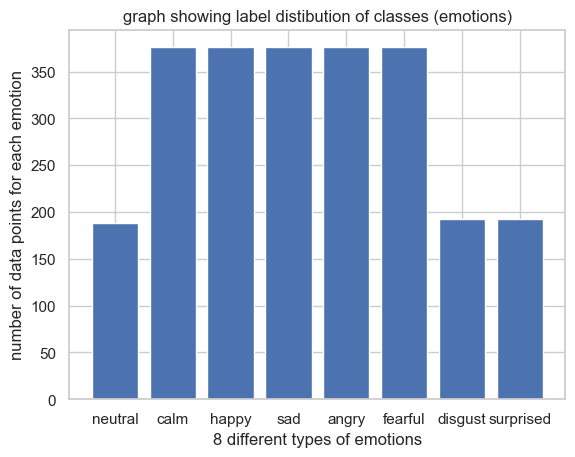

In [121]:
plt.bar(count_dict.keys(), count_dict.values())
plt.title('graph showing label distibution of classes (emotions)')
plt.xlabel('8 different types of emotions')
plt.ylabel('number of data points for each emotion')
plt.show()

Since the song dataset does not have disgust, neutral and surprised datapoints, hence fewer observations

In [123]:
tess= 'OAF_Fear'
len(os.listdir(os.path.join('C:/Users/Harshita Shukla/SER/data/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data', tess)))

200

In [124]:
tess_dict_old = {}
for tess in os.listdir('C:/Users/Harshita Shukla/SER/data/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data'):
  for item in os.listdir(os.path.join('C:/Users/Harshita Shukla/SER/data/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data', tess)):
    if tess.split('_')[0]=='OAF':

      tess_dict_old.update({tess.split('_')[1]: len(os.listdir(os.path.join('C:/Users/Harshita Shukla/SER/data/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data', tess)))})
print(tess_dict_old)
     

{'angry': 200, 'disgust': 200, 'Fear': 200, 'happy': 200, 'neutral': 200, 'Pleasant': 200, 'Sad': 200}


In [125]:
tess_dict_young = {}
for tess in os.listdir('C:/Users/Harshita Shukla/SER/data/TESS/TESS Toronto emotional speech set data'):
  for item in os.listdir(os.path.join('C:/Users/Harshita Shukla/SER/data/TESS/TESS Toronto emotional speech set data', tess)):
    if tess.split('_')[0]=='YAF':

      tess_dict_young.update({tess.split('_')[1]: len(os.listdir(os.path.join('C:/Users/Harshita Shukla/SER/data/TESS/TESS Toronto emotional speech set data', tess)))})
print(tess_dict_young)

{'angry': 200, 'disgust': 200, 'fear': 200, 'happy': 200, 'neutral': 200, 'pleasant': 200, 'sad': 200}


In [126]:
tess_dict ={}

for i in tess_dict_old.keys():
  for j in tess_dict_young.keys():
    if i.lower()==j.lower():
      tess_dict.update({i.lower(): tess_dict_old[i]+tess_dict_young[j]})
print(tess_dict)

{'angry': 400, 'disgust': 400, 'fear': 400, 'happy': 400, 'neutral': 400, 'pleasant': 400, 'sad': 400}


[]

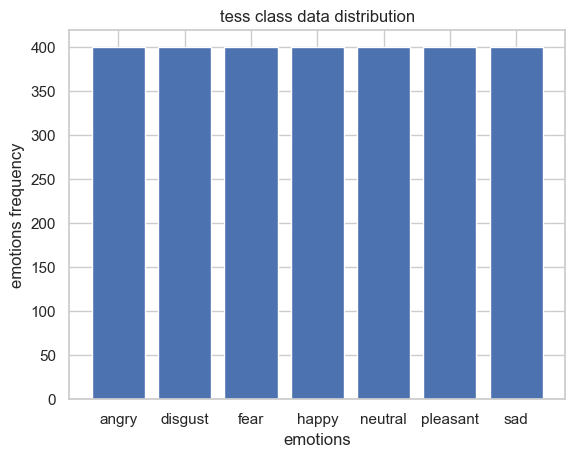

In [127]:
plt.bar(tess_dict.keys(),tess_dict.values())
plt.title('tess class data distribution')
plt.xlabel('emotions')
plt.ylabel('emotions frequency')
plt.plot()

In [128]:
count_dict.keys()

dict_keys(['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised'])

In [129]:
tess_dict.keys()

dict_keys(['angry', 'disgust', 'fear', 'happy', 'neutral', 'pleasant', 'sad'])

In [130]:
labels = {}
for r in count_dict.keys():
  for t in tess_dict.keys():
    if r[0]==t[0]:
      labels.update({r: count_dict[r]+ tess_dict[t]})
labels.update({'calm': 376})

print(labels)

{'neutral': 588, 'happy': 776, 'sad': 776, 'angry': 776, 'fearful': 776, 'disgust': 592, 'surprised': 592, 'calm': 376}


In [131]:
labels['fear'] = labels.pop('fearful')
labels

{'neutral': 588,
 'happy': 776,
 'sad': 776,
 'angry': 776,
 'disgust': 592,
 'surprised': 592,
 'calm': 376,
 'fear': 776}

[]

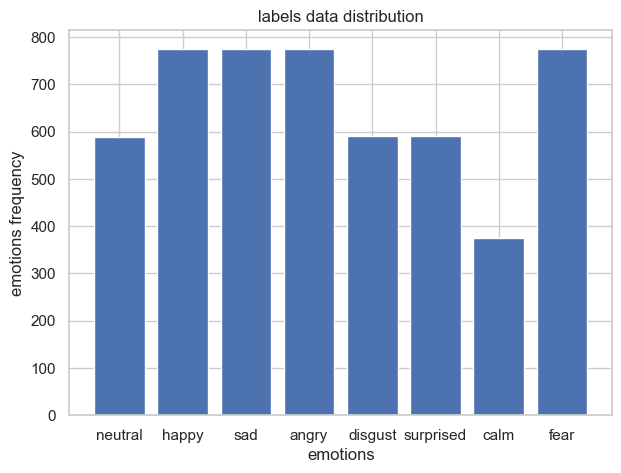

In [132]:
#plotting final data labels
plt.figure(figsize=(7, 5))
plt.bar(labels.keys(), labels.values())
plt.title('labels data distribution')
plt.xlabel('emotions')
plt.ylabel('emotions frequency')
plt.plot()

In [133]:
# analysis for data labels
# 1. calm emotion is the lowest in count 376
#2. happy, sad, angry and fearul emotion has the highest count 776
# 3. neutral, disgust and surprised emotion has average value of approx 590
# So, overall there's a slight imbalance in the dataset but not a huge one and we can move forward for feature extraction

print('total number of data points :', sum(list(labels.values())))
     

total number of data points : 5252


In [134]:
# importing librosa library for mfcc and other feature extractions



In [135]:

import soundfile


Finding Audio Lengths

In [136]:
import wave
import contextlib
import sys
     

In [137]:
tess_aud_len = []
for tess in os.listdir('C:/Users/Harshita Shukla/SER/data/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data'):
  for item in os.listdir(os.path.join('C:/Users/Harshita Shukla/SER/data/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data', tess)):

    fname = os.path.join('C:/Users/Harshita Shukla/SER/data/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data', tess, item)
    try:
      with contextlib.closing(wave.open(fname,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        f.close()
        duration = frames / float(rate)
        tess_aud_len.append(duration)

    except:
      e = sys.exc_info()[0]

print(len(tess_aud_len))
     

2798


In [138]:
tess_aud_len[10:15]

[1.4338084705496845,
 1.6866142377324487,
 1.457032850004096,
 1.490906856721553,
 1.6347177848775294]

In [139]:
song_aud_len = []
for song in os.listdir('C:/Users/Harshita Shukla/SER/data/RAVDESS_song/audio_song_actors_01-24'):
  for item in os.listdir(os.path.join('C:/Users/Harshita Shukla/SER/data/RAVDESS_song/audio_song_actors_01-24', song)):

    fname = os.path.join('C:/Users/Harshita Shukla/SER/data/RAVDESS_song/audio_song_actors_01-24', song, item)
    try:
      with contextlib.closing(wave.open(fname,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        f.close()
        duration = frames / float(rate)
        song_aud_len.append(duration)

    except:
      e = sys.exc_info()[0]

print(len(song_aud_len))
print(song_aud_len[10:15])

1012
[4.7380625, 4.938270833333333, 4.571229166666667, 4.471125, 4.337666666666666]


In [140]:
speech_aud_len = []
for speech in os.listdir('C:/Users/Harshita Shukla/SER/data/RAVDESS_speech/audio_Speech_actors_01-24'):
  for item in os.listdir(os.path.join('C:/Users/Harshita Shukla/SER/data/RAVDESS_Speech/audio_speech_actors_01-24', speech)):

    fname = os.path.join('C:/Users/Harshita Shukla/SER/data/RAVDESS_Speech/audio_speech_actors_01-24', speech, item)
    try:
      with contextlib.closing(wave.open(fname,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        f.close()
        duration = frames / float(rate)
        speech_aud_len.append(duration)

    except:
      e = sys.exc_info()[0]

print(len(speech_aud_len))
print(speech_aud_len[10:15])

1440
[4.204208333333334, 4.004, 3.4701458333333335, 3.470125, 3.5368541666666666]


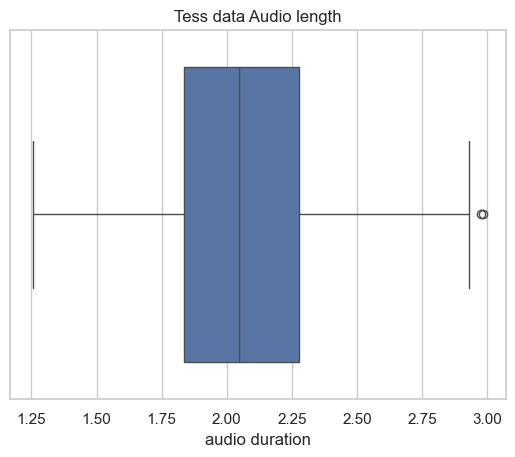

In [141]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x= tess_aud_len)
plt.title('Tess data Audio length')
plt.xlabel('audio duration')
plt.show()

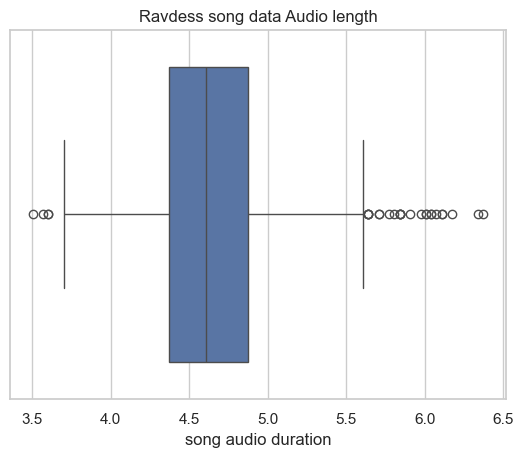

In [142]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x= song_aud_len)
plt.title('Ravdess song data Audio length')
plt.xlabel('song audio duration')
plt.show()
     

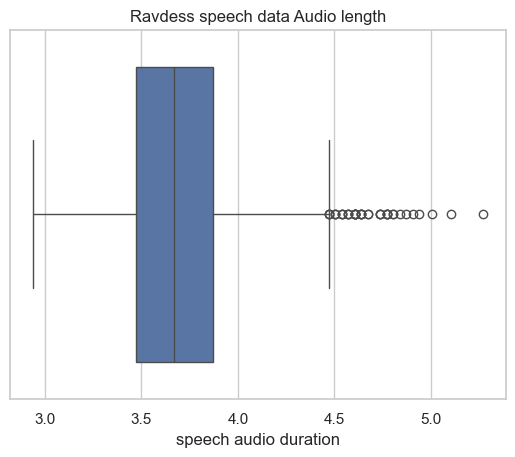

In [143]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x= speech_aud_len)
plt.title('Ravdess speech data Audio length')
plt.xlabel('speech audio duration')
plt.show()
     

In [144]:
from tqdm import tqdm

In [145]:
# Initialize lists to store features
mel_tess = []
mfcc_tess = []

# Directory containing TESS dataset
data_dir = 'C:/Users/Harshita Shukla/SER/data/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data'

# Loop through each subdirectory (emotion category)
for tess in tqdm(os.listdir(data_dir)):
    tess_dir = os.path.join(data_dir, tess)
    # Skip hidden files and directories
    if not os.path.isdir(tess_dir) or tess.startswith('.'):
        continue
    # Loop through each file in the subdirectory
    for i in os.listdir(tess_dir):
        # Skip hidden files and non-audio files
        if not i.endswith('.wav') or i.startswith('.'):
            continue
        file_path = os.path.join(tess_dir, i)
        try:
            # Load the audio file
            y, sr = librosa.load(file_path, sr=None)
            # Extract Mel spectrogram and MFCC features
            mel_tess.append(np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0))
            mfcc_tess.append(np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0))
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

print("Feature extraction complete.")


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:36<00:00,  2.60s/it]

Feature extraction complete.


In [146]:
len(mel_tess)

2800

In [147]:
len(mfcc_tess)

2800

In [148]:
mel_tess[0].shape

(128,)

In [149]:
mfcc_tess[0].shape

(13,)

In [80]:
mel_song =[]
mfcc_song =[]

for song in tqdm(os.listdir('C:/Users/Harshita Shukla/SER/data/RAVDESS_song/audio_song_actors_01-24')):
  for i in os.listdir(os.path.join('C:/Users/Harshita Shukla/SER/data/RAVDESS_song/audio_song_actors_01-24', song)):

    y, sr = librosa.load(os.path.join('C:/Users/Harshita Shukla/SER/data/RAVDESS_song/audio_song_actors_01-24', song, i))
    mel_song.append(np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis= 0))
    mfcc_song.append(np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc= 13).T, axis=0))
  
print('****')
print(len(mel_song))
print(len(mfcc_song))

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:59<00:00,  2.59s/it]

****
1012
1012


In [81]:
mel_speech =[]
mfcc_speech =[]

for speech in tqdm(os.listdir('C:/Users/Harshita Shukla/SER/data/RAVDESS_speech/audio_speech_actors_01-24')):
  for i in os.listdir(os.path.join('C:/Users/Harshita Shukla/SER/data/RAVDESS_speech/audio_speech_actors_01-24', speech)):

    y, sr = librosa.load(os.path.join('C:/Users/Harshita Shukla/SER/data/RAVDESS_speech/audio_speech_actors_01-24', speech, i))
    mel_speech.append(np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis= 0))
    mfcc_speech.append(np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc= 13).T, axis=0))
  
print('****')
print(len(mel_speech))
print(len(mfcc_speech))

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [02:01<00:00,  5.07s/it]

****
1440
1440


In [150]:
for i in mel_tess:
  i.reshape(1,-1)
mel_feat_tess = np.vstack((mel_tess))
mel_feat_tess.shape

(2800, 128)

In [151]:
for i in mfcc_tess:
  i.reshape(1,-1)
mfcc_feat_tess = np.vstack((mfcc_tess))
mfcc_feat_tess.shape

(2800, 13)

In [152]:
feat_tess = np.hstack((mel_feat_tess, mfcc_feat_tess))
print(feat_tess.shape)

(2800, 141)


In [153]:
# for speech
for i in mel_speech:
  i.reshape(1,-1)
mel_feat_speech = np.vstack((mel_speech))
print(mel_feat_speech.shape)

for j in mfcc_speech:
  j.reshape(1,-1)
mfcc_feat_speech = np.vstack((mfcc_speech))
print(mfcc_feat_speech.shape)

feat_speech = np.hstack((mel_feat_speech, mfcc_feat_speech))
print(feat_speech.shape)

(1440, 128)
(1440, 13)
(1440, 141)


In [154]:
# for song
for i in mel_song:
  i.reshape(1,-1)
mel_feat_song = np.vstack((mel_song))
print(mel_feat_song.shape)

for j in mfcc_song:
  j.reshape(1,-1)
mfcc_feat_song = np.vstack((mfcc_song))
print(mfcc_feat_song.shape)

feat_song = np.hstack((mel_feat_song, mfcc_feat_song))
print(feat_song.shape)

(1012, 128)
(1012, 13)
(1012, 141)


In [155]:
# total features

features = np.vstack((feat_tess, feat_song, feat_speech ))
features.shape

(5252, 141)

In [163]:
# Creating a Dataframe
#1. Tess

tess_emotion=[]
tess_path = []

for tess in tqdm(os.listdir('C:/Users/Harshita Shukla/SER/data/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data')):
  for item in os.listdir(os.path.join('C:/Users/Harshita Shukla/SER/data/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data', tess)):
    tess_path.append(os.path.join('C:/Users/Harshita Shukla/SER/data/TESS//TESS Toronto emotional speech set data/TESS Toronto emotional speech set data', tess, item))
    tess_emotion.append(tess.split('_')[1])

print(len(tess_emotion))
print(len(tess_path)) 

print(tess_emotion[0:5])
print(tess_path[0:5])

100%|█████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 745.89it/s]

2800
2800
['angry', 'angry', 'angry', 'angry', 'angry']
['C:/Users/Harshita Shukla/SER/data/TESS//TESS Toronto emotional speech set data/TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav', 'C:/Users/Harshita Shukla/SER/data/TESS//TESS Toronto emotional speech set data/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav', 'C:/Users/Harshita Shukla/SER/data/TESS//TESS Toronto emotional speech set data/TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav', 'C:/Users/Harshita Shukla/SER/data/TESS//TESS Toronto emotional speech set data/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav', 'C:/Users/Harshita Shukla/SER/data/TESS//TESS Toronto emotional speech set data/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']


In [164]:
#2. Speech

speech_path = []
speech_emotion=[]

for speech in tqdm(os.listdir('C:/Users/Harshita Shukla/SER/data/RAVDESS_speech/audio_speech_actors_01-24')):
  for item in os.listdir(os.path.join('C:/Users/Harshita Shukla/SER/data/RAVDESS_speech/audio_speech_actors_01-24', speech)):
    speech_path.append(os.path.join('C:/Users/Harshita Shukla/SER/data/RAVDESS_speech/audio_speech_actors_01-24', speech, item))
    speech_emotion.append(item.split('-')[2])

print(len(speech_path))
print(len(speech_emotion)) 

print(speech_path[0:5])
print(speech_emotion[0:5])

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 349.45it/s]

1440
1440
['C:/Users/Harshita Shukla/SER/data/RAVDESS_speech/audio_speech_actors_01-24\\Actor_01\\03-01-01-01-01-01-01.wav', 'C:/Users/Harshita Shukla/SER/data/RAVDESS_speech/audio_speech_actors_01-24\\Actor_01\\03-01-01-01-01-02-01.wav', 'C:/Users/Harshita Shukla/SER/data/RAVDESS_speech/audio_speech_actors_01-24\\Actor_01\\03-01-01-01-02-01-01.wav', 'C:/Users/Harshita Shukla/SER/data/RAVDESS_speech/audio_speech_actors_01-24\\Actor_01\\03-01-01-01-02-02-01.wav', 'C:/Users/Harshita Shukla/SER/data/RAVDESS_speech/audio_speech_actors_01-24\\Actor_01\\03-01-02-01-01-01-01.wav']
['01', '01', '01', '01', '02']


In [165]:
#3. Song

song_path = []
song_emotion=[]

for song in tqdm(os.listdir('C:/Users/Harshita Shukla/SER/data/RAVDESS_song/audio_song_actors_01-24')):
  for item in os.listdir(os.path.join('C:/Users/Harshita Shukla/SER/data/RAVDESS_song/audio_song_actors_01-24', song)):
    song_path.append(os.path.join('C:/Users/Harshita Shukla/SER/data/RAVDESS_song/audio_song_actors_01-24', song, item))
    song_emotion.append(item.split('-')[2])

print(len(song_path))
print(len(song_emotion)) 

print(song_path[0:5])
print(song_emotion[0:5])

100%|████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 1431.08it/s]

1012
1012
['C:/Users/Harshita Shukla/SER/data/RAVDESS_song/audio_song_actors_01-24\\Actor_01\\03-02-01-01-01-01-01.wav', 'C:/Users/Harshita Shukla/SER/data/RAVDESS_song/audio_song_actors_01-24\\Actor_01\\03-02-01-01-01-02-01.wav', 'C:/Users/Harshita Shukla/SER/data/RAVDESS_song/audio_song_actors_01-24\\Actor_01\\03-02-01-01-02-01-01.wav', 'C:/Users/Harshita Shukla/SER/data/RAVDESS_song/audio_song_actors_01-24\\Actor_01\\03-02-01-01-02-02-01.wav', 'C:/Users/Harshita Shukla/SER/data/RAVDESS_song/audio_song_actors_01-24\\Actor_01\\03-02-02-01-01-01-01.wav']
['01', '01', '01', '01', '02']


In [166]:
final_emotion = tess_emotion+ song_emotion + speech_emotion
print('final class label', len(final_emotion))
print(final_emotion[5000:5010])

final class label 5252
['07', '07', '07', '07', '08', '08', '08', '08', '08', '08']


In [167]:
final_path = tess_path + song_path + speech_path
print('final paths of datapoints', len(final_path))
print(final_path[5000:5010])
     

final paths of datapoints 5252
['C:/Users/Harshita Shukla/SER/data/RAVDESS_speech/audio_speech_actors_01-24\\Actor_20\\03-01-07-02-01-01-20.wav', 'C:/Users/Harshita Shukla/SER/data/RAVDESS_speech/audio_speech_actors_01-24\\Actor_20\\03-01-07-02-01-02-20.wav', 'C:/Users/Harshita Shukla/SER/data/RAVDESS_speech/audio_speech_actors_01-24\\Actor_20\\03-01-07-02-02-01-20.wav', 'C:/Users/Harshita Shukla/SER/data/RAVDESS_speech/audio_speech_actors_01-24\\Actor_20\\03-01-07-02-02-02-20.wav', 'C:/Users/Harshita Shukla/SER/data/RAVDESS_speech/audio_speech_actors_01-24\\Actor_20\\03-01-08-01-01-01-20.wav', 'C:/Users/Harshita Shukla/SER/data/RAVDESS_speech/audio_speech_actors_01-24\\Actor_20\\03-01-08-01-01-02-20.wav', 'C:/Users/Harshita Shukla/SER/data/RAVDESS_speech/audio_speech_actors_01-24\\Actor_20\\03-01-08-01-02-01-20.wav', 'C:/Users/Harshita Shukla/SER/data/RAVDESS_speech/audio_speech_actors_01-24\\Actor_20\\03-01-08-01-02-02-20.wav', 'C:/Users/Harshita Shukla/SER/data/RAVDESS_speech/audio_

In [168]:
df = pd.DataFrame(data={'path': final_path, 'emotions': final_emotion})
df.iloc[0,:]

path        C:/Users/Harshita Shukla/SER/data/TESS//TESS T...
emotions                                                angry
Name: 0, dtype: object

In [169]:
df['emotions'].unique()

array(['angry', 'disgust', 'Fear', 'happy', 'neutral', 'Pleasant', 'Sad',
       'fear', 'pleasant', 'sad', '01', '02', '03', '04', '05', '06',
       '07', '08'], dtype=object)

In [170]:
df =df.replace({'emotions': {'01': 'neutral',
 '02': 'calm',
 '03': 'happy',
 '04': 'sad',
 '05': 'angry',
 '06': 'fear',
 '07': 'disgust',
 '08': 'surprised',
 'Pleasant': 'surprised',
 'pleasant': 'surprised',
 'Fear': 'fear',
 'Sad':'sad'}})


In [171]:
df['emotions'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprised', 'sad',
       'calm'], dtype=object)

In [172]:
df_feat = pd.DataFrame(features)
df_feat.shape

(5252, 141)

In [173]:
df_new= pd.concat([df, df_feat], axis=1)
print(df_new.shape)
df_new.head()
     

(5252, 143)


,path,emotions,0,1,2,3,4,5,6,7,...,131,132,133,134,135,136,137,138,139,140
0,C:/Users/Harshita Shukla/SER/data/TESS//TESS T...,angry,0.041156,0.002387,0.000364,0.000177,0.000953,0.010366,0.034019,0.068375,...,-10.704582,-6.318041,9.424742,-20.741861,-12.001624,-7.151769,-7.919952,1.646008,-0.940950,2.213202
1,C:/Users/Harshita Shukla/SER/data/TESS//TESS T...,angry,0.036919,0.001104,0.000065,0.000040,0.001084,0.008617,0.021841,0.050969,...,-16.812130,-14.137628,12.182584,-8.768966,-0.833089,-12.662774,1.033061,-7.188158,3.722568,4.862129
2,C:/Users/Harshita Shukla/SER/data/TESS//TESS T...,angry,0.041884,0.001107,0.000058,0.000038,0.000912,0.008446,0.015219,0.057436,...,2.124631,-3.238453,5.009407,-20.190369,-2.519338,-12.905815,-1.877586,-11.231725,2.015583,3.097071
3,C:/Users/Harshita Shukla/SER/data/TESS//TESS T...,angry,0.053379,0.002345,0.000218,0.000110,0.000514,0.012339,0.047546,0.127341,...,-13.309978,-5.566482,8.417089,-18.068226,-11.134800,-10.535916,-8.044547,0.351155,-1.321829,2.518441
4,C:/Users/Harshita Shukla/SER/data/TESS//TESS T...,angry,0.057969,0.002499,0.001002,0.000940,0.010199,0.055426,0.088061,0.191269,...,10.967580,2.167008,6.005213,-25.438648,4.935778,-12.994334,-16.313234,-10.588129,-5.183738,-4.256830


In [174]:
df_new.to_csv("D:\SER\CSV_files\data.csv")

In [175]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [176]:
class_label = df['emotions']
df_final= df_new.drop(columns= ['emotions', 'path'])
print(class_label.shape)
print(df_final.shape)
     

(5252,)
(5252, 141)


In [177]:
x_train, x_test, y_train, y_test = train_test_split(df_final, class_label, test_size=0.20, stratify= class_label)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4201, 141)
(1051, 141)
(4201,)
(1051,)


In [178]:
x_train.to_csv("D:\SER\CSV_files\data.csv")

In [179]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
2069,0.007309,0.002174,0.002316,0.002426,0.002224,0.029077,0.410404,1.577485,2.288243,2.149897,...,36.118816,-9.938104,-3.299628,-6.805689,-13.087158,-0.178740,-0.263792,-15.195052,12.899303,-7.958405
3250,0.000060,0.000059,0.000042,0.000026,0.007731,0.289291,0.443240,0.377713,0.338483,0.010312,...,7.293817,-0.866751,3.354656,-0.624927,-1.790801,-10.238297,-8.058616,2.284676,-4.151154,-3.040562
4230,0.002280,0.000227,0.000105,0.001934,0.012035,0.047231,0.104987,0.184408,0.344638,0.559794,...,8.841893,2.040865,-10.518717,-11.621033,-11.430616,-5.877293,-5.119502,-8.303647,-1.752788,-3.748998
1988,0.135490,0.054789,0.012440,0.017746,0.012633,0.029788,0.038073,0.071501,0.330655,0.954517,...,23.284451,5.144412,1.472697,1.336611,-3.313264,-6.600978,6.835112,-15.514299,5.642512,-1.566995
2532,0.009924,0.000599,0.000272,0.000295,0.000824,0.028684,0.178410,0.313628,0.164846,0.058767,...,-6.323021,-18.988718,1.356441,-6.129956,-8.196671,-12.287027,7.520196,-8.657785,-0.216135,-0.506037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,0.064615,0.012206,0.004601,0.002177,0.020347,0.261600,0.745242,0.471053,0.285093,0.239342,...,-7.518704,-5.224514,4.351614,-7.713800,3.246706,-11.431384,-5.083398,-6.674121,-7.445797,-4.621814
3038,0.000955,0.000004,0.000004,0.000002,0.000009,0.000037,0.000052,0.000918,0.005255,0.007883,...,8.083452,-13.343344,-26.505674,-6.661575,-19.256866,-2.561123,3.892519,-15.811987,-5.121357,-11.490999
2862,0.000012,0.000010,0.000007,0.000007,0.000010,0.000027,0.000025,0.000054,0.000212,0.003806,...,3.714005,-13.923206,-15.760270,-6.579982,-17.145473,-10.689756,-4.755213,-14.210482,-4.743709,-10.761060
864,0.029783,0.000677,0.000051,0.000028,0.000258,0.033923,0.420251,0.231105,0.013342,0.001678,...,7.562218,3.108831,8.988018,-4.853550,-3.172102,-14.707484,-2.678513,-5.606958,3.535591,-1.879560


In [180]:
y_train

2069        happy
3250         calm
4230    surprised
1988         fear
2532    surprised
          ...    
1034    surprised
3038        happy
2862        happy
864       neutral
4152         fear
Name: emotions, Length: 4201, dtype: object

In [181]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)




In [185]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(x_train.shape)
print(x_test.shape)

type(x_train)

(4201, 141)
(1051, 141)


numpy.ndarray

In [189]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim



In [202]:
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)


In [203]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

In [204]:
# Reshape to (batch_size, in_channels, sequence_length)
x_train_tensor = x_train_tensor.unsqueeze(1)  # Add channel dimension
x_test_tensor = x_test_tensor.unsqueeze(1)    # Add channel dimension


In [205]:
from torch.utils.data import DataLoader, TensorDataset

# Create datasets
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)  
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)   

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [216]:
class Conv1DModel(nn.Module):
    def __init__(self):
        super(Conv1DModel, self).__init__()
        
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=8, stride=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=8, stride=1)
        self.conv3 = nn.Conv1d(in_channels=128, out_channels=128, kernel_size=8, stride=1)
        
        self.pool = nn.MaxPool1d(kernel_size=4, stride=4)
        self.dropout = nn.Dropout(0.2)
        self.batch_norm = nn.BatchNorm1d(128)
        
        self.fc1 = nn.Linear(128 * 6, 256)  # Adjust input size based on flattened size
        self.fc2 = nn.Linear(256, 8)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = self.dropout(x)
        
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = self.dropout(x)
        x = self.batch_norm(x)
        
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return F.log_softmax(x, dim=1)  # Use log softmax for stability

# Create the model
model1 = Conv1DModel()
print(model1)


Conv1DModel(
  (conv1): Conv1d(1, 64, kernel_size=(8,), stride=(1,))
  (conv2): Conv1d(64, 128, kernel_size=(8,), stride=(1,))
  (conv3): Conv1d(128, 128, kernel_size=(8,), stride=(1,))
  (pool): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (batch_norm): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=768, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=8, bias=True)
)


In [217]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss combines LogSoftmax and NLLLoss
optimizer = optim.Adam(model1.parameters(), lr=0.001)


In [218]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=35):
    model.train()  # Set the model to training mode

    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()  # Zero the parameter gradients
            
            # Forward pass
            outputs = model(inputs)
            
            # Compute loss
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
        
        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

# Train the model
train_model(model1, train_loader, criterion, optimizer, num_epochs=35)


Epoch [1/35], Loss: 1.8851
Epoch [2/35], Loss: 1.5755
Epoch [3/35], Loss: 1.2973
Epoch [4/35], Loss: 1.2043
Epoch [5/35], Loss: 1.1097
Epoch [6/35], Loss: 1.0661
Epoch [7/35], Loss: 1.0116
Epoch [8/35], Loss: 0.9667
Epoch [9/35], Loss: 0.9109
Epoch [10/35], Loss: 0.9031
Epoch [11/35], Loss: 0.8567
Epoch [12/35], Loss: 0.8354
Epoch [13/35], Loss: 0.8262
Epoch [14/35], Loss: 0.8000
Epoch [15/35], Loss: 0.7700
Epoch [16/35], Loss: 0.7609
Epoch [17/35], Loss: 0.7207
Epoch [18/35], Loss: 0.7309
Epoch [19/35], Loss: 0.7115
Epoch [20/35], Loss: 0.7011
Epoch [21/35], Loss: 0.6732
Epoch [22/35], Loss: 0.6607
Epoch [23/35], Loss: 0.6561
Epoch [24/35], Loss: 0.6502
Epoch [25/35], Loss: 0.6252
Epoch [26/35], Loss: 0.6055
Epoch [27/35], Loss: 0.6085
Epoch [28/35], Loss: 0.5904
Epoch [29/35], Loss: 0.5748
Epoch [30/35], Loss: 0.5747
Epoch [31/35], Loss: 0.5688
Epoch [32/35], Loss: 0.5609
Epoch [33/35], Loss: 0.5405
Epoch [34/35], Loss: 0.5293
Epoch [35/35], Loss: 0.5133


In [219]:
from sklearn.metrics import accuracy_score, f1_score
def evaluate_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    true_labels = []
    predicted_labels = []

    with torch.no_grad():  # No need to compute gradients
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            true_labels.extend(labels.numpy())
            predicted_labels.extend(predicted.numpy())

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predicted_labels) * 100
    # Calculate F1 score (weighted for multi-class classification)
    f1 = f1_score(true_labels, predicted_labels, average='weighted') * 100

    print(f'Accuracy: {accuracy:.2f}%')
    print(f'F1 Score: {f1:.2f}%')

evaluate_model(model1, test_loader)

Accuracy: 76.02%
F1 Score: 76.97%
